In [1]:
## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

In [3]:
data = pd.read_csv("data/data_processed.csv", low_memory=False)
data

,id,date,variable,value,month,day,day_of_week
0,AS14.01,2014-02-26,mood,6.000,2,26,2
1,AS14.01,2014-02-26,mood,6.000,2,26,2
2,AS14.01,2014-02-26,mood,6.000,2,26,2
3,AS14.01,2014-02-26,mood,7.000,2,26,2
4,AS14.01,2014-02-27,mood,6.000,2,27,3
...,...,...,...,...,...,...,...
376705,AS14.30,2014-04-11,appCat.weather,8.032,4,11,4
376706,AS14.30,2014-04-19,appCat.weather,3.008,4,19,5
376707,AS14.30,2014-04-26,appCat.weather,7.026,4,26,5
376708,AS14.30,2014-04-27,appCat.weather,23.033,4,27,6


In [82]:
merged = pd.read_csv("data/merged.csv")
merged["mood_avg_next"]  = merged["mood_avg"].shift(-1)
# merged = merged[:-1]
feature_merged = merged.loc[:, merged.columns != 'mood_avg_next'].set_index(["date"])

merged_sans_nans = pd.read_csv("data/merged_sans_nans.csv") 
feature_merged_sans_nans = merged_sans_nans.loc[:, merged_sans_nans.columns != 'mood_avg_next'].set_index(["date"])


# merged["date"] = pd.to_datetime(merged["date"])
# merged = merged.set_index('date')
# merged[['utilities_avg', 'social_avg',
#        'screen_avg', 'office_avg', 'other_avg', 'valence_avg',
#        'unknown_avg', 'finance_avg', 'builtin_avg',
#        'communication_avg', 'activity_avg', 'weather_avg', 'entertainment_avg',
#        'game_avg', 'travel_avg']] = merged[['utilities_avg', 'social_avg',
#        'screen_avg', 'office_avg', 'other_avg', 'valence_avg',
#        'unknown_avg', 'finance_avg', 'builtin_avg',
#        'communication_avg', 'activity_avg', 'weather_avg', 'entertainment_avg',
#        'game_avg', 'travel_avg']].interpolate(method='time')
# merged = merged.groupby("id", as_index=False).apply(lambda group: group.ffill().bfill())

# merged_sans_nans = merged.reset_index().drop('level_0', axis=1).set_index(["id", "date"])
# merged_sans_nans.to_csv("data/merged_sans_nans.csv")

In [85]:
# imputing missing values

# statistical, ML --> 3D MICE, TA-DualCV 


merged.set_index("date")
merged_sans_nans.set_index("date")


,id,mood_avg,utilities_avg,social_avg,arousal_avg,screen_avg,office_avg,call_avg,other_avg,valence_avg,...,communication_avg,activity_avg,weather_avg,entertainment_avg,game_avg,travel_avg,month,day,day_of_week,mood_avg_next
date,,,,,,,,,,,,,,,,,,,,,
2014-02-26,AS14.01,6.250000,23.029000,75.141667,-0.250000,153.665872,57.402000,1.0,29.968875,0.750000,...,55.095526,0.134050,30.386000,53.024000,116.518,70.418846,2,26,2,6.333333
2014-02-26,AS14.01,6.333333,23.029000,75.141667,0.000000,153.665872,57.402000,0.0,29.968875,0.333333,...,55.095526,0.134050,30.386000,53.024000,116.518,70.418846,2,26,2,6.200000
2014-02-26,AS14.01,6.200000,23.029000,75.141667,0.200000,153.665872,57.402000,1.0,29.968875,0.200000,...,55.095526,0.134050,30.386000,53.024000,116.518,70.418846,2,26,2,6.400000
2014-02-26,AS14.01,6.400000,39.207000,36.636000,0.600000,47.613651,57.402000,1.0,14.020429,0.500000,...,51.697063,0.236880,30.386000,46.662000,116.518,37.305000,2,26,2,6.800000
2014-02-27,AS14.01,6.800000,30.086000,50.046611,0.200000,67.067644,3.010000,0.0,12.137167,0.800000,...,53.442031,0.142741,30.386000,31.448667,116.518,83.961000,2,27,3,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-10,AS14.33,6.200000,18.724333,50.259100,-0.600000,113.607750,44.738625,1.0,17.835750,0.400000,...,59.382943,0.012704,13.084375,62.347000,162.983,0.939000,3,10,0,8.200000
2014-03-10,AS14.33,8.200000,5.111000,99.281685,0.000000,113.657683,44.738625,1.0,27.891895,1.200000,...,37.238750,0.103301,13.084375,43.907571,162.983,0.939000,3,10,0,7.000000
2014-03-10,AS14.33,7.000000,1.599500,198.880222,-1.333333,118.978033,44.738625,1.0,9.734000,1.000000,...,54.388125,0.169354,13.084375,68.369000,162.983,0.939000,3,10,0,6.800000


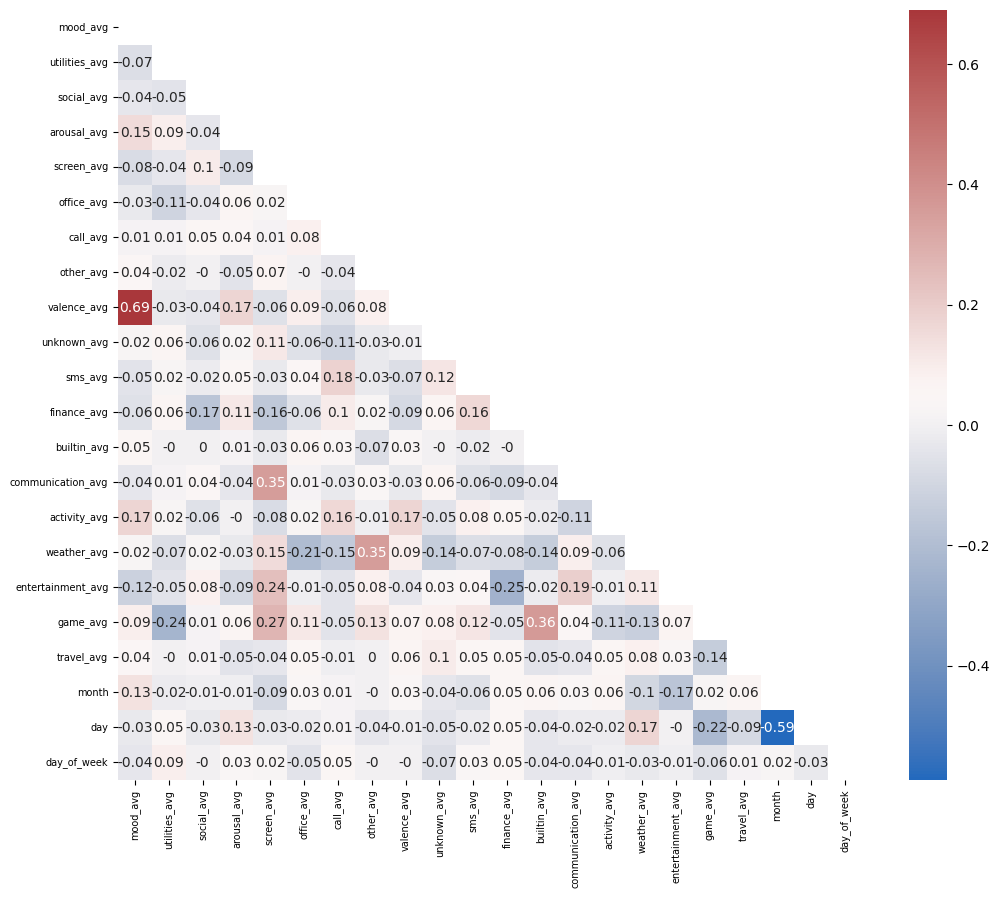

In [83]:
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10))

mat = feature_merged.iloc[: , 1:].corr().round(2)
mat3 = feature_merged_sans_nans.iloc[: , 1:].corr().round(2)

mask = np.triu(np.ones_like(mat, dtype=bool))
mask3 = np.triu(np.ones_like(mat3, dtype=bool))

plt.xticks(fontsize = 7) 
plt.yticks(fontsize = 7) 

# standard
sns.heatmap(mat, annot=True, cmap="vlag", mask=mask)
plt.show()


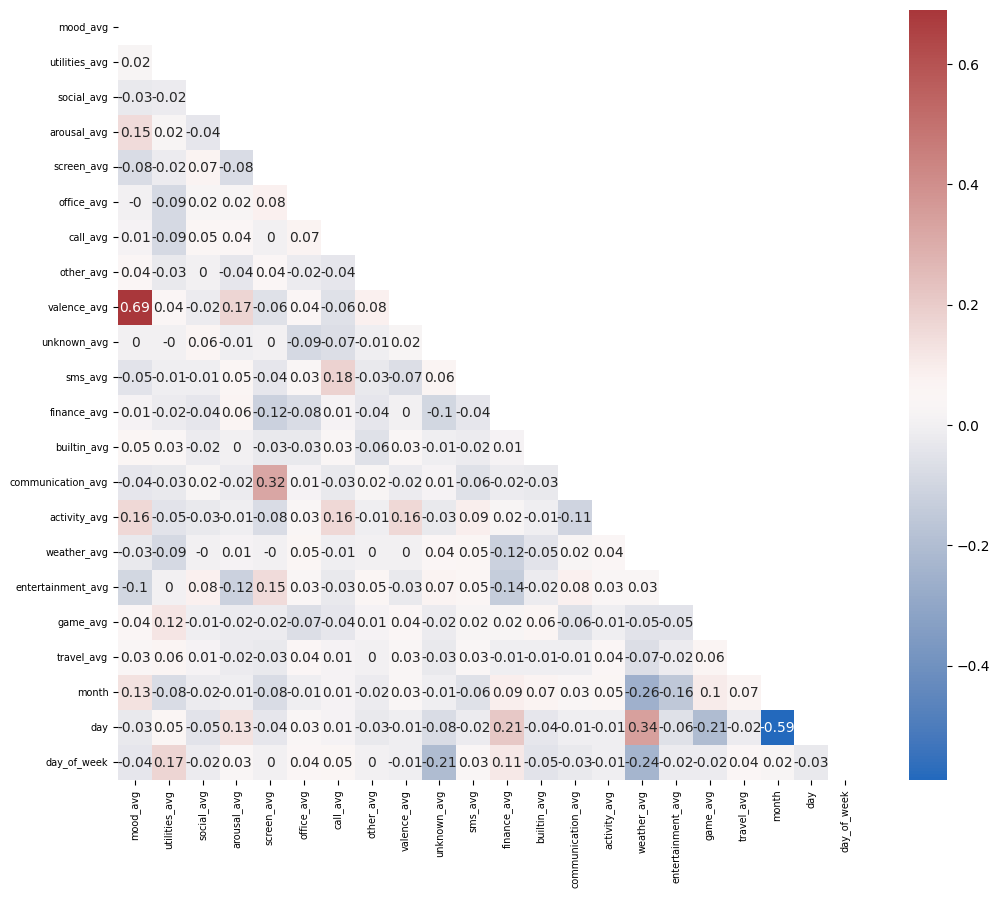

In [84]:
# with filled nans
fig, ax = plt.subplots(figsize=(12, 10))
plt.xticks(fontsize = 7) 
plt.yticks(fontsize = 7) 

sns.heatmap(mat3, annot=True, cmap = "vlag", mask=mask3)
plt.show()

In [ ]:
# hierboven zien we negatieve correlatie tussen tijd op scherm en communicatie apps en activiteit en positieve correlatie tussen valence en arousal


              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         5
         6.0       0.37      0.28      0.32        53
         7.0       0.58      0.73      0.64       130
         8.0       0.48      0.37      0.42        62
         9.0       0.00      0.00      0.00         3

    accuracy                           0.52       254
   macro avg       0.24      0.23      0.23       254
weighted avg       0.49      0.52      0.50       254



ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (8).

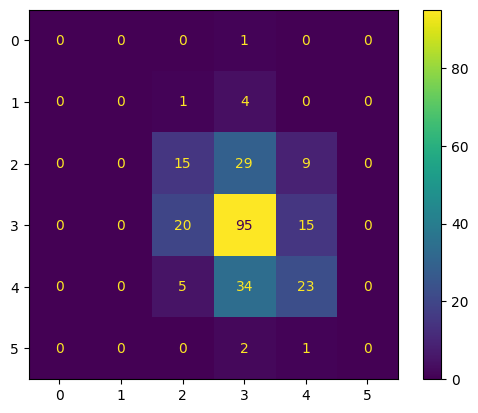

In [79]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np

labels = merged["mood_avg_next"].round()
X = feature_merged.iloc[:, 1:]
# classifier
y = np.array(labels, dtype=str)
# regression
# y = np.array(labels, dtype=float)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

m = HistGradientBoostingClassifier().fit(X_train, y_train)
y_pred = m.predict(X_test)



print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=m.classes_)
disp.plot()

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         5
         6.0       0.52      0.30      0.38        53
         7.0       0.56      0.81      0.66       130
         8.0       0.53      0.31      0.39        62
         9.0       0.00      0.00      0.00         3

    accuracy                           0.55       254
   macro avg       0.23      0.20      0.20       254
weighted avg       0.53      0.55      0.51       254



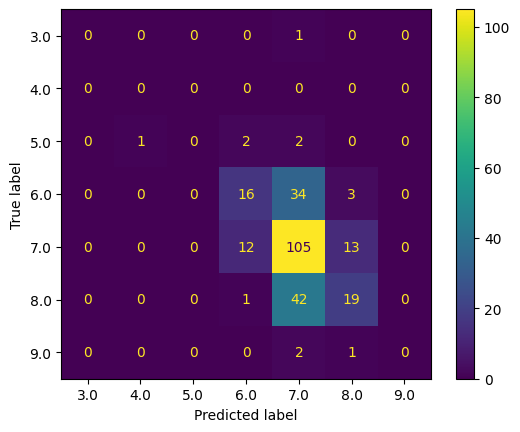

In [81]:
labels = merged_sans_nans["mood_avg_next"].round()
X = feature_merged_sans_nans.iloc[:, 1:]
y = np.array(labels, dtype=str)
# regression
# y = np.array(labels, dtype=float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

m = RandomForestClassifier().fit(X_train, y_train)
y_pred = m.predict(X_test)



print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=m.classes_)
disp.plot()


In [ ]:
tscv = TimeSeriesSplit()

for train_index, test_index in tscv.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)

     #To get the indices 
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]